## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 4
Due 11/4/2024 by 5p

### Problem 1
Write a function ```greaterThan(A, lower_lim)``` that takes as an argument a numpy array A and a number lower_lim and returns an array with every entry less than or equal to lower_lim replaced by zero. That is to say, only the numbers strictly greater than lower_lim remain, the rest are 0.

In [16]:
import numpy as np
# Source: https://numpy.org/devdocs/reference/generated/numpy.where.html
def greaterThan (A, lower_lim):
    new_array = np.where(A > lower_lim, A, 0) # 0 is broadcast; keeps only values that are greater than lower_lim
    return new_array

In [18]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

assert np.all(greaterThan(A, 5) == np.array([0, 0, 0, 0, 0, 6, 7, 8, 9]))
assert np.all(greaterThan(B, 0) == np.array([[0, 1], [2, 0], [0, 3]]))
assert np.all(greaterThan(C, 100) == np.array([[101.1, 0, 0], [0, 100.1, 0], [103.2, 0, 0]]))

print("You passed all the tests!")

You passed all the tests!


### Problem 2
Write a function ```subtractMean(A)``` that takes as an input the numpy array and returns the array with the mean of all the values subtracted from every element.

In [24]:
import numpy as np
def subtractMean(A):
    mean = np.mean(A)
    minus_mean = A-mean
    return minus_mean

If the tests below aren't passing, check the values of A, B, and C. These should be the same as in the test for Problem 1. If the values in these arrays have changed, why might that be?

In [26]:
assert np.isclose(subtractMean(A), np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])).all()
assert np.isclose(subtractMean(B), np.array([[-1.5,  0.5],[ 1.5, -2.5],[-0.5,  2.5]])).all()
assert np.isclose(subtractMean(C), np.array([[ 1.1,  0. , -0.1],[-0.2,  0.1, -1.1],[ 3.2, -1. , -2. ]])).all()

print("You passed all the tests!")


You passed all the tests!


### Problem 3

Write a function ```arrayEdges``` that takes as an input an array and returns a 1-D array of all the elements on the edges of the array starting at the upper left corner and working around clockwise. Do not repeat that first element. If the original array is not 2-D, print('Error') and return -1.

*Hint*: Get the shape of the array as height and width, calculate the perimeter (remember not to double count the corners), and make an array of zeros the size of the perimeter. Then fill that array.

*Hint 2*: The length of the shape of a 2-D array is 2.

*Hint 3*: ```dA = A.dtype``` is the data type of A. ```np.zeros().astype(dA)``` creates an array of that type (if A has strings, this will make an array of '0').

In [8]:
'''your code here'''
import numpy as np

def arrayEdges(A):
    # If the original array is not 2-D, print('Error') and return -1. Hint 2: The length of the shape of a 2-D array is 2.
    if len(A.shape) != 2:
        return -1
        print ('Error')
# Hint 1: Get the shape of the array as height and width, calculate the perimeter (remember not to double count the corners)
    height, width = A.shape
    perimeter = 2 * height + 2 * width - 4 # four corners
# Hint 3: dA = A.dtype is the data type of A. np.zeros().astype(dA) creates an array of that type
    dA = A.dtype
    edges = np.zeros(perimeter).astype(dA)

# Seperate then add back together
    top = list(A[0, :])                     
    right = list(A[1:, -1]) # Minus top edge                 
    bottom = list(A[-1, -2::-1]) # Reversed and minus bottom right edge           
    left = list(A[-2:0:-1, 0]) # Reveresed and minus both edges

    clockwise = np.array(top + right + bottom + left, dtype=dA)
    
    return clockwise

In [20]:
print(arrayEdges(B))

[-1  1 -2  3  0  2]


In [10]:
'''Test your code'''

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([['you', 'got', 'this'],['!','correct','problem']])
Z = np.array(['but','this','wont', 'work'])

assert np.array(arrayEdges(X) == np.array([1, 2, 3, 6, 9, 8, 7, 4])).all()
assert np.array(arrayEdges(Y) == np.array(['you', 'got', 'this', 'problem', 'correct', '!'])).all()
assert arrayEdges(Z) == -1

print("You passed all the tests! (disregard that it says Error above...it's supposed to do that)")


You passed all the tests! (disregard that it says Error above...it's supposed to do that)


## Palmer's Penguins

Below I've imported the Palmer's Penguins dataset, courtesy of Alison Horst's github. Fill in the blanks in Problem 4. You should add code cells below to write code to find the answers.

In [37]:
import pandas as pd

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
pp_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [39]:
# Answers to first two questions
# Source: https://pandas.pydata.org/docs/user_guide/10min.html
pp_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [51]:
import pandas as pd
# Source: https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization
pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
species_counts = pp_df['species'].value_counts()
print(species_counts)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


### Problem 4

 1. How many penguins were recorded? 

  - 344 penguins (found in count)

 2. In terms of body mass, how big were the smallest and biggest penguins measured?

(found in min and max rows of .describe)
  - Min: 2700g
  - Max: 6300g

 3. What species of penguins were recorded and how many of each?

 - Adelie: 152
 - Gentoo: 124
 - Chinstrap: 68

### Problem 5
Plot a histogram of the body masses of penguins grouped by species. Make sure to include a title, axis labels, and a legend.

In [39]:
species = pp_df['species'].unique()
species

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

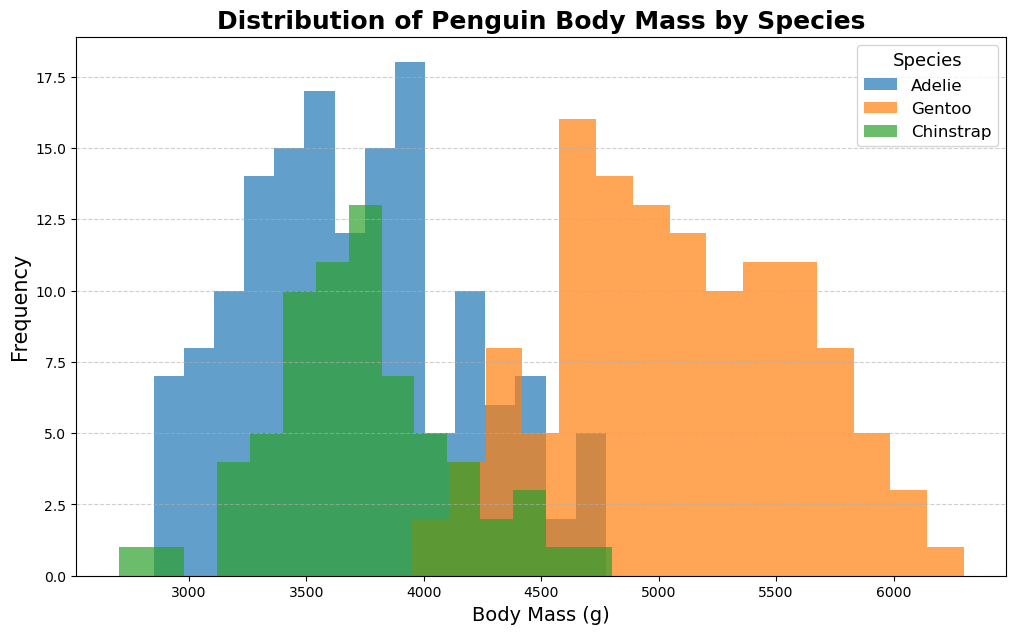

In [67]:
'''your code here'''
import pandas as pd
import matplotlib.pyplot as plt

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')

# Clean missing data from body mass. Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna
pp_df = pp_df.dropna(subset=['body_mass_g'])

species = pp_df['species'].unique() # https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.SeriesGroupBy.unique.html#pandas.core.groupby.SeriesGroupBy.unique
species_counts = pp_df['species'].value_counts()

plt.figure(figsize=(12,7))
for s in species:
    data = pp_df[pp_df['species'] == s]['body_mass_g']
    plt.hist(data, bins=15, stacked=True, label=s, alpha=0.7) 

plt.title("Distribution of Penguin Body Mass by Species", fontsize=18, fontweight='bold')
plt.xlabel("Body Mass (g)", fontsize=14)
plt.ylabel("Frequency", fontsize=15)
plt.legend(title="Species", title_fontsize='13', fontsize='12', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


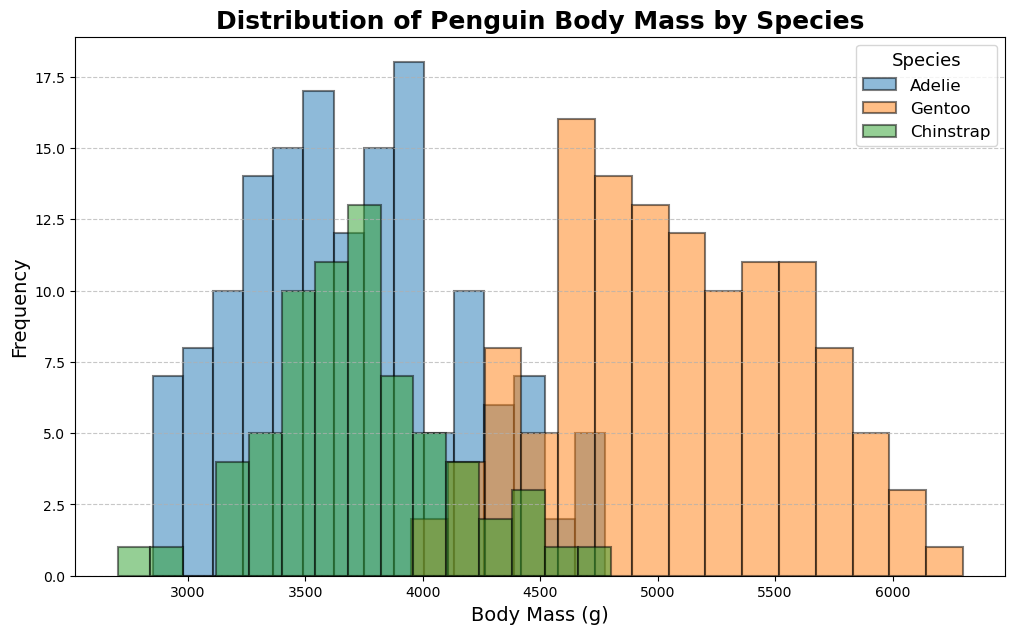

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
# Source: https://scales.arabpsychology.com/stats/how-to-plot-histograms-by-group-in-pandas/
pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')

pp_df = pp_df.dropna(subset=['body_mass_g']) # Source: # Clean missing data from body mass. Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna

Adelie = pp_df.loc[pp_df['species'] == 'Adelie', 'body_mass_g']
Gentoo = pp_df.loc[pp_df['species'] == 'Gentoo', 'body_mass_g']
Chinstrap = pp_df.loc[pp_df['species'] == 'Chinstrap', 'body_mass_g']

plt.figure(figsize=(12, 7))

plt.hist(Adelie, bins=15, alpha=0.5, label='Adelie', edgecolor='black', linewidth=1.5)
plt.hist(Gentoo, bins=15, alpha=0.5, label='Gentoo', edgecolor='black', linewidth=1.5)
plt.hist(Chinstrap, bins=15, alpha=0.5, label='Chinstrap', edgecolor='black', linewidth=1.5)

plt.title('Distribution of Penguin Body Mass by Species', fontsize=18, fontweight='bold')
plt.xlabel('Body Mass (g)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Species', title_fontsize='13', fontsize='12')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

plt.show()

### Challenge Problem

Write a function ```interleaveArrays``` that takes as arguments two numpy arrays A and B and return a new numpy array with the rows of A and B interleaved, starting with A. If you run out of rows from one matrix or the other complete the array with the remaining rows of the longer array.

If the two arrays do not have the same number of columns, print('Error: Shapes of arrays are not compatible.') and return -1
If the two arrays contain different data types, print('Error: Types of arrays are not compatible.') and return -2

Example:

```
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)
```
returns
```
array([[1,2,3], [10,20,30], [4, 5, 6], [100, 200, 300], [1000, 2000, 3000]])
```

In [83]:
'''your code here'''

# Source: https://www.geeksforgeeks.org/python-interleave-multiple-lists-of-same-length/
import numpy as np
def interleave(A, B):
# If the two arrays do not have the same number of columns, print('Error: Shapes of arrays are not compatible.') and return -1
    if A.shape[1] != B.shape[1]:
        print('Error: Shapes of arrays are not compatible.')
        return -1

# If the two arrays contain different data types, print('Error: Types of arrays are not compatible.') and return -2
    if A.dtype != B.dtype:
        print('Error: Types of arrays are not compatible.')
        return -2

    weaved = []
    a = 0  
    b = 0  
    
    while a < A.shape[0] or b < B.shape[0]:
        # If array A has unprocessed rows, append the next row
        if a < A.shape[0]:
            result.append(A[a])
            a += 1
        # If array B has unprocessed rows, append the next row
        if j < B.shape[0]:
            result.append(B[j])
            j += 1

    # Convert the result list back to a numpy array and return it
    return np.array(result)

    
    
    
    for row in range(max_length):
        if row < len_A:
            interleaved.append(A[row])
        if row < len_B:
            interleaved.append(B[row])
    
    return np.array(interleaved)


In [85]:
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)

array([[   1,    2,    3],
       [  10,   20,   30],
       [   4,    5,    6],
       [ 100,  200,  300],
       [1000, 2000, 3000]])